The following code trains models on the Cat Recognition dataset and tests the model at regular Epoch Count intervals, and then plots graphs of Test Prediction Accuracy against Epoch Count and Training Time against Epoch Count.

'Progress: Complete'

Training Times Regression Line Gradient: 0.01


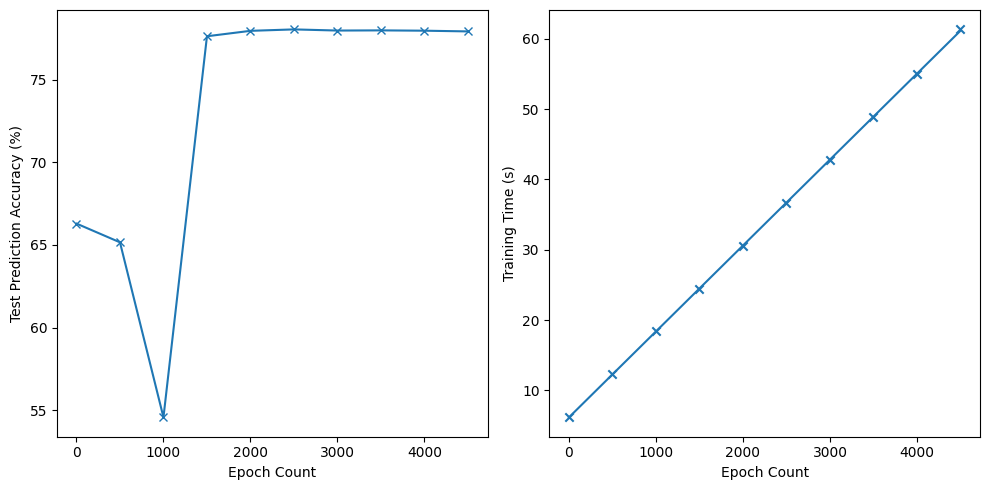

In [6]:
from IPython.display import clear_output, display
import os

import matplotlib.pyplot as plt
import numpy as np

from school_project.models.gpu.cat_recognition import CatRecognitionModel as Model

# Change to root directory of project
os.chdir(os.getcwd())

# Set width and height of figure
plt.rcParams["figure.figsize"] = [10, 5]

# Generate list of Epoch Counts from 1 to 5000, incremented by 500
epoch_count_interval = 500
epoch_counts = np.array(list(range(0, 5_000, epoch_count_interval)))

test_prediction_accuracies = np.array([])
training_times = np.array([])

# Create model object
model = Model(hidden_layers_shape=[100, 100],
              train_dataset_size=209,
              learning_rate=0.1,
              use_relu=True)
model.create_model_values()

for index, epoch_count in enumerate(epoch_counts):
    clear_output(wait=True)
    display(f"Progress: {round(number=index/len(epoch_counts) * 100, ndigits=2)}%")

    model.train(epoch_count=epoch_count_interval)
    model.test()

    test_prediction_accuracies = np.append(test_prediction_accuracies, 
                                           model.test_prediction_accuracy)
    
    # Add training times cumulatively
    if len(training_times) != 0:
        training_times = np.append(training_times,
                                   training_times[-1] + model.training_time)
    else:
        training_times = np.append(training_times,
                                   model.training_time)
    
clear_output(wait=True)
display("Progress: Complete")

figure, axis = plt.subplots(nrows=1, ncols=2)

axis[0].set_xlabel("Epoch Count")
axis[0].set_ylabel("Test Prediction Accuracy (%)")

# Plot regression line
axis[0].plot(epoch_counts, test_prediction_accuracies, marker='x')

# Determine gradient and y-intercept of training times regression line
m, c = np.polyfit(epoch_counts, training_times, deg=1)
print(f"Training Times Regression Line Gradient: {round(number=m, ndigits=2)}")

axis[1].set_xlabel("Epoch Count")
axis[1].set_ylabel("Training Time (s)")

# Plot scatter graph of epoch counts and training times
axis[1].scatter(epoch_counts, training_times, marker='x')

# Plot regression line
axis[1].plot(epoch_counts, m * epoch_counts + c)

plt.tight_layout()
plt.show()

As shown above, as the epoch count increases so does both the test prediction accuracy and the training time taken.